### Stock Price Prection

##### Using supervised linear as well as regularized linear regression models (lasso,ridge) to evaluate predicted end results using metrics factors such as mse, rmse, r2_score etc on the 'NG=F' codenamed stock dataset of yahoo finance.

In [ ]:
! pip install yfinance

In [4]:
import numpy as np
import pandas as pd

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
stocks=input('enter stock code:')
data=yf.download(stocks,"2008-01-01","2021-01-18",auto_adjust=True)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,53775


### EDA

In [6]:
data.shape

(3282, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2008-01-02 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3282 non-null   float64
 1   High    3282 non-null   float64
 2   Low     3282 non-null   float64
 3   Close   3282 non-null   float64
 4   Volume  3282 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB


In [8]:
data.describe()

,Open,High,Low,Close,Volume
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,3.713705,3.787288,3.635038,3.707074,131397.603595
std,1.830425,1.865744,1.789584,1.825297,54393.040171
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691250,2.736500,2.644000,2.693000,91744.250000
50%,3.253000,3.312000,3.183500,3.240500,126669.500000
75%,4.157750,4.244750,4.066750,4.152000,161490.500000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


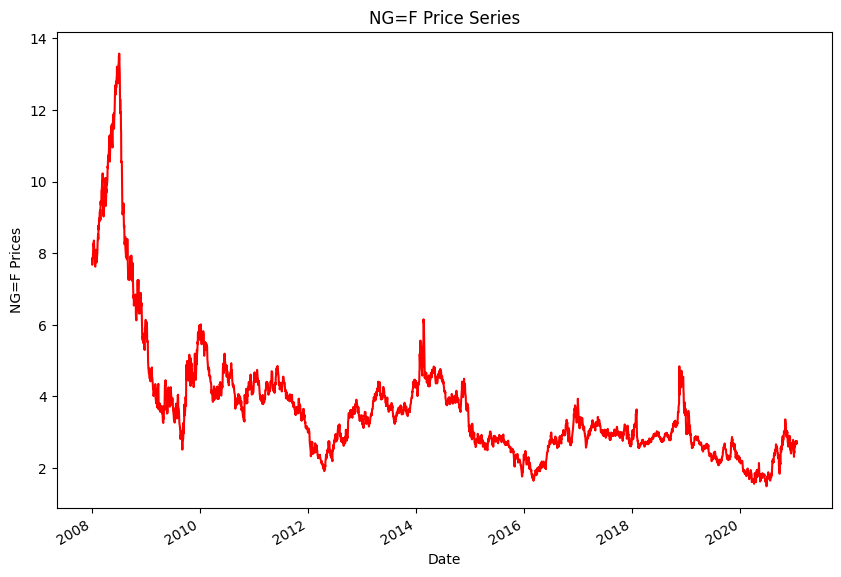

In [9]:
data.Close.plot(figsize=(10,7),color='r')
plt.ylabel('{} Prices'.format(stocks))
plt.title('{} Price Series'.format(stocks))
plt.show()

/Users/harishankarvs/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Close', ylabel='Density'>

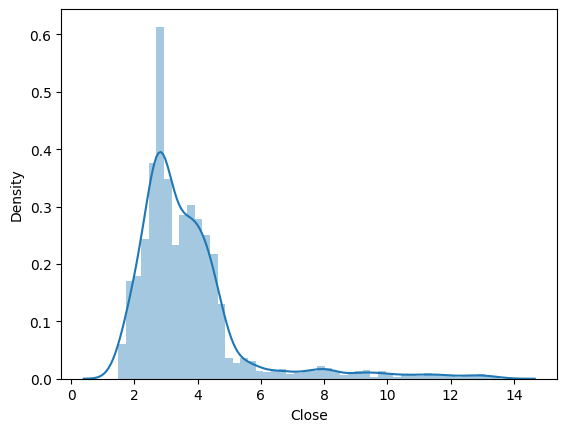

In [10]:
sns.distplot(data['Close'])

/Users/harishankarvs/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Open', ylabel='Density'>

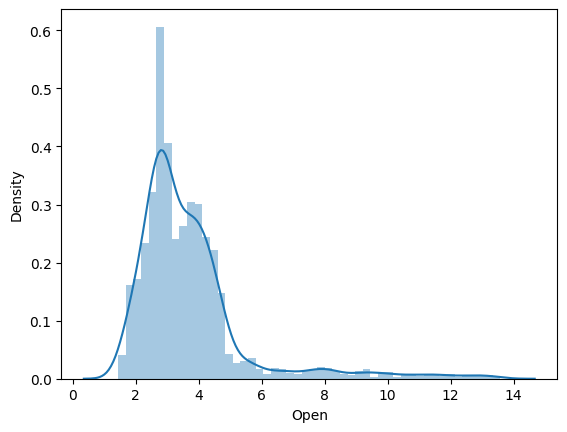

In [11]:
sns.distplot(data['Open'])

/Users/harishankarvs/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='High', ylabel='Density'>

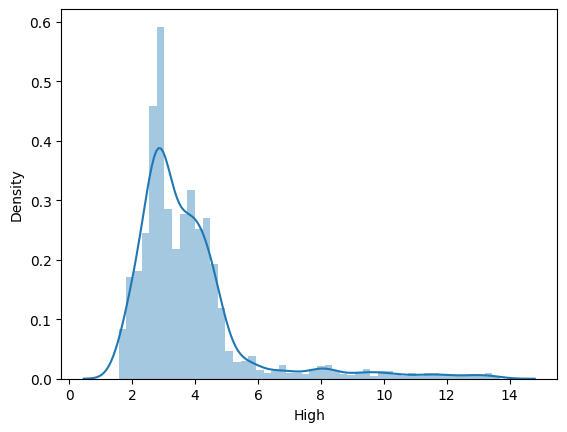

In [12]:
sns.distplot(data['High'])

### Conclusions

    - Shape of data 
    - data distribution (very nonlinear)

    - Linear, Logis, Regularized, SVM


### Model training

#### Approach 1:- Linear Regression

In [13]:
X=data.drop('Close',axis=1)
y=data['Close']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2625, 4)
(657, 4)
(2625,)
(657,)


In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred1=lr.predict(X_test)

##### Model Evaluation

In [15]:
# MSE -- > Mean Squared
# RMSE -- > sqrt(MSE)
# r2_score -- > 1.0 # good model

from sklearn.metrics import mean_squared_error,r2_score
def calculate_metrics(y_test,y_pred):
    '''
    y_test:- ground truth
    y_pred:- model predict
    '''
    
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2_scors=r2_score(y_test,y_pred)
    
    print('MSE:-',mse)
    print('RMSE:-',rmse)
    print('R2_score:-',r2_scors)
calculate_metrics(y_test,pred1)

MSE:- 0.0015345662928837405
RMSE:- 0.03917354072436829
R2_score:- 0.9994383299702719


#### Approach 2:- Regularized linear regression models   (lasso,ridge)

##### Model Training

In [16]:
from sklearn.linear_model import Lasso,Ridge
la=Lasso().fit(X_train,y_train)
ri=Ridge().fit(X_train,y_train)

la_p=la.predict(X_test)
ri_p=ri.predict(X_test)

##### Model Evaluation

In [17]:
# lasso regression 
calculate_metrics(y_test,la_p)

MSE:- 0.23692336260533006
RMSE:- 0.486747740215946
R2_score:- 0.9132831519010182


In [18]:
#ridge regression
calculate_metrics(y_test,ri_p)

MSE:- 0.0016151026199612945
RMSE:- 0.040188339353117025
R2_score:- 0.999408852689666


#### Approach 3:- Support Vector Regression

In [19]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr=SVR()

param_grid={
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

grid=GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.075 total time=   0.2s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.070 total time=   0.2s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.072 total time=   0.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.073 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.050 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.074 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.070 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.050 total time=   0.1s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.073 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [20]:
svr=SVR(C=1000,gamma=0.01,kernel='rbf')
svr.fit(X_train,y_train)
svr_pred=svr.predict(X_test)

In [22]:
import joblib

joblib.dump(ri,'model.pkl')
ridge_from_joblib = model = joblib.load('model.pkl')